In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Creat smaple data

data = {
    'beta': np.random.beta(5, 1, 1000) * 60,
    'exponential': np.random.exponential(10, 1000),
    'normal_p': np.random.normal(10, 2, 1000),
    'normal_l': np.random.normal(10, 10, 1000)
}
df = pd.DataFrame(data)

In [3]:
first_half = np.random.normal(20, 3, 500)
second_half = np.random.normal(-20, 3, 500)
bimodal = np.concatenate([first_half, second_half])
# first_half
# second_half
# bimodal

In [4]:
df['bimodal'] = bimodal

In [5]:
df

,beta,exponential,normal_p,normal_l,bimodal
0,56.719562,16.233965,12.504841,8.378674,19.438649
1,57.261506,29.072103,9.094623,6.961800,17.359616
2,50.859720,6.595824,9.949544,17.422032,18.777100
3,57.913497,2.762088,7.890541,1.211502,19.296591
4,55.374773,36.977318,12.699094,15.759204,22.431308
...,...,...,...,...,...
995,57.199534,41.758695,9.303324,-1.054569,-16.437265
996,42.287154,10.460304,8.009687,-10.519929,-18.236653
997,43.578795,5.869723,10.253868,18.349916,-16.745320
998,51.562759,14.895485,6.508974,8.664396,-18.362154


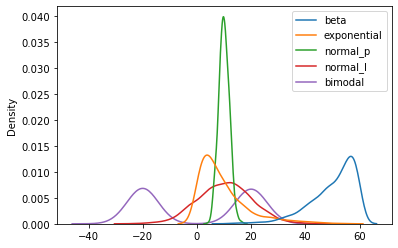

In [6]:
#Vizualization data
sns.kdeplot(data=df);

In [7]:
#Data information
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.357511,9.601516,9.998506,10.346367,-0.038088
std,8.335134,9.161868,1.956151,9.795307,20.245683
min,11.971139,0.021547,4.099579,-23.049917,-30.780421
25%,46.019678,3.161400,8.641616,3.790401,-19.897422
50%,52.748535,6.703457,9.962449,10.563957,0.488847
75%,56.855703,12.763205,11.290462,17.160730,20.020821
max,59.998358,54.365188,17.001127,46.806280,28.609877


In [8]:
#Add random super big data
normal_big = np.random.normal(100000, 100000, (1000, 1))
df['normal_big'] = normal_big

In [9]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,56.719562,16.233965,12.504841,8.378674,19.438649,128637.808809
1,57.261506,29.072103,9.094623,6.961800,17.359616,-95277.577532
2,50.859720,6.595824,9.949544,17.422032,18.777100,119147.145415
3,57.913497,2.762088,7.890541,1.211502,19.296591,130583.808371
4,55.374773,36.977318,12.699094,15.759204,22.431308,178514.445047


<AxesSubplot:ylabel='Density'>

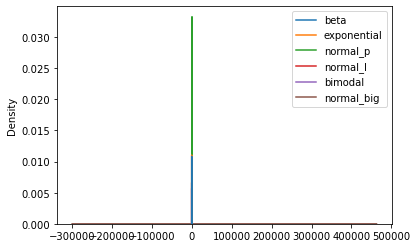

In [10]:
sns.kdeplot(data=df)

<AxesSubplot:>

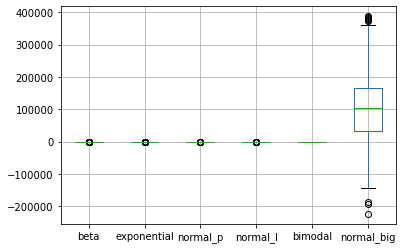

In [11]:
df.boxplot()

In [12]:
#Stand standardized data
s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df)
print(type(df_s))

<class 'numpy.ndarray'>


In [13]:
df_s

array([[ 0.76366307,  0.7242812 ,  1.28189999, -0.20098171,  0.96250061,
         0.24884889],
       [ 0.82871482,  2.12623999, -0.46230367, -0.34570237,  0.85975903,
        -2.0039789 ],
       [ 0.06028215, -0.32822953, -0.02504223,  0.72271396,  0.92980822,
         0.15336268],
       ...,
       [-0.81367722, -0.40752172,  0.13060852,  0.81748877, -0.82563733,
        -0.7108079 ],
       [ 0.14467082,  0.57811557, -1.78476954, -0.17179791, -0.90553797,
         0.89637252],
       [-0.67382383,  0.2812656 ,  1.3373731 ,  0.06278164, -1.03727753,
         0.51889359]])

In [14]:
col_names = df.columns.tolist()
col_names

['beta', 'exponential', 'normal_p', 'normal_l', 'bimodal', 'normal_big']

In [15]:
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.763663,0.724281,1.281900,-0.200982,0.962501,0.248849
1,0.828715,2.126240,-0.462304,-0.345702,0.859759,-2.003979
2,0.060282,-0.328230,-0.025042,0.722714,0.929808,0.153363
3,0.906976,-0.746884,-1.078148,-0.933042,0.955480,0.268428
4,0.602242,2.989511,1.381253,0.552871,1.110392,0.750661


<AxesSubplot:ylabel='Density'>

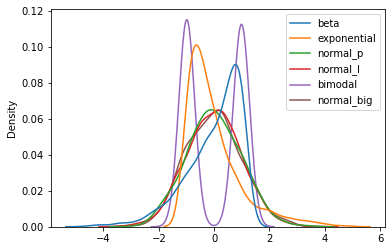

In [16]:
#Visualization df_s
sns.kdeplot(data=df_s)

<AxesSubplot:xlabel='normal_big', ylabel='Density'>

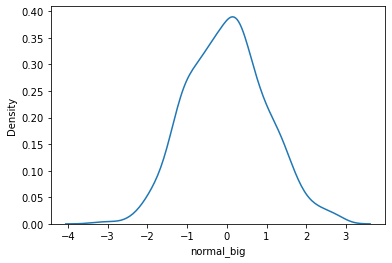

In [17]:
df_normal_big = df_s['normal_big']
sns.kdeplot(data=df_normal_big)

In [18]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,7.777112e-16,-1.166289e-16,-2.000622e-16,8.260059e-17,1.985079e-16,-1.394440e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.607674e+00,-1.046158e+00,-3.017088e+00,-3.411123e+00,-1.519223e+00,-3.302555e+00
25%,-5.206880e-01,-7.032778e-01,-6.940000e-01,-6.696316e-01,-9.814078e-01,-7.260911e-01
50%,2.870044e-01,-3.164757e-01,-1.844174e-02,2.222478e-02,2.604004e-02,5.906530e-03
75%,7.800047e-01,3.452649e-01,6.607888e-01,6.960244e-01,9.912704e-01,6.390960e-01
max,1.157230e+00,4.888312e+00,3.581588e+00,3.724044e+00,1.415724e+00,2.857185e+00


<AxesSubplot:>

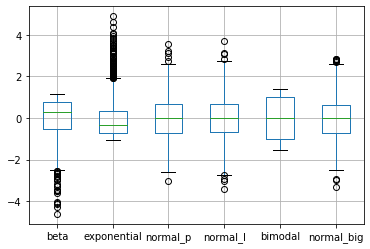

In [19]:
df_s.boxplot()